In [1]:
# import module list is independent on respective file.

import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import sys
import yfinance as yf

from datetime import datetime as dt
from datetime import date as date
from datetime import timedelta
from dateutil.relativedelta import relativedelta

import seaborn as sns
from scipy.stats import mstats

from tqdm.notebook import tqdm

import japanize_matplotlib



In [4]:
import calendar
from datetime import date 
def get_nth_week(day):
    return (day - 1) // 7 + 1

def get_nth_dow(year, month, day):
    return get_nth_week(day), calendar.weekday(year, month, day)

def get_day_of_nth_dow(year, month, nth, dow):
    '''dow: Monday(0) - Sunday(6)'''
    if nth < 1 or dow < 0 or dow > 6:
        return None

    first_dow, n = calendar.monthrange(year, month)
    day = 7 * (nth - 1) + (dow - first_dow) % 7 + 1

    return day if day <= n else None
def get_nth_dow_datetime_dt(dt):
    return get_nth_week(dt.day), dt.weekday()
def get_nth_dow_datetime(year, month, day):
    return get_nth_week(day), date(year, month, day).weekday()

def get_date_of_nth_dow(year, month, nth, dow):
    day = get_day_of_nth_dow(year, month, nth, dow)
    return date(year, month, day) if day else None

In [5]:
jabond = pd.read_csv('data/JA_Bond_day.csv',index_col=0, parse_dates=True, encoding='cp932')['Close']

In [6]:
train_data['jabond'] = jabond

NameError: name 'train_data' is not defined

In [24]:
data = pd.read_csv('data/訓練データ_20241030.csv', index_col=0, parse_dates=True)

# Kerasを使って　分類モデルを作ろう!

In [7]:
import warnings
warnings.simplefilter('ignore')

from sklearn.metrics import matthews_corrcoef

from scipy.stats import mstats
import japanize_matplotlib
from tqdm.notebook import tqdm

from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding, Dropout

In [8]:
def create_feature(data, window_size):
    window_data = []
    X, Y = [], []
    
    if len(data) - window_size >= 1:
        
        for i in range(len(data)-window_size):
            window = data[i:i+window_size]

            X.append(window)

            Y.append(data[i + window_size - 1])
            
            #window_data.append(window)
    else:
        for i in range(len(data)-window_size+1):
            window = data[i:i+window_size]
            #window_data.append(window)
            
    
            X.append(window)

            Y.append(data[i + window_size - 1])
    
    
    
    # [[], []. []......]
    print(np.array(X))
    return (np.array(X).reshape(-1, window_size, 1), np.array(Y))

In [ ]:
'''
def lstm_comp(df):
  # 入力層/中間層/出力層のネットワーク構築
  model = Sequential()
  model.add(LSTM(256, activation='relu', batch_input_shape=(None, df.shape[1], df.shape[2])))
  model.add(Dropout(0.2))
  model.add(Dense(256, activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(1, activation='sigmoid'))

  # ネットワークのコンパイル
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=["accuracy"])
  return model

'''

In [95]:
df.shape

(115, 38)

In [96]:
def lstm_pred(df):
    model = Sequential()

    length = df.shape[1]#X_train.shape[1]
    hidden_layers = 128
    in_out_neurons = 1
    length_of_sequences = df.shape[0]
    #model.add(Embedding(input_dim=length, output_dim=256, input_length=5))
    model.add(LSTM(hidden_layers,
                   #batch_size=32,
                   input_shape=(length_of_sequences, in_out_neurons),
                   return_sequences=False,
                 stateful=False))
    model.add(Dropout(0.2))
    model.add(Dense(hidden_layers, activation='relu'))
    model.add(Dropout(0.2))
      
    
    # 1 or 9
    model.add(Dense(1, activation='softmax'))

    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

model.summary()

Model: "sequential_1813"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Layer (type)                       ┃ Output Shape                  ┃     Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ lstm_1809 (LSTM)                   │ (None, 128)                   │      66,560 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dropout_1804 (Dropout)             │ (None, 128)                   │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dense_1804 (Dense)                 │ (None, 1)                     │         129 │
└────────────────────────────────────┴───────────────────────────────┴─────────────┘

 Total params: 200,069 (781.52 KB)

 Trainable params: 66,689 (260.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 133,380 (521.02 KB)

In [20]:
from tensorflow.keras.callbacks import EarlyStopping
callbacks = [EarlyStopping(monitor='val_loss',
                           patience=5, # ここで指定したエポック数の間改善がないと停止
                           verbose=1,
                           mode='max')
            ]
import numpy as np
from sklearn.model_selection import train_test_split



In [36]:
cols = data.columns

In [85]:
from sklearn.model_selection import TimeSeriesSplit
TimeSeriesSplit(5)

TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None)

In [87]:
folds = TimeSeriesSplit(5)
for i in folds.split(df):
    print(i)
    

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19]), array([20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38]))
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38]), array([39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55,
       56, 57]))
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57]), array([58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74,
       75, 76]))
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40

In [90]:
X_list(folds.split(df))[4][0]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95]),
 array([ 96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108,
        109, 110, 111, 112, 113, 114]))

In [93]:
list(folds.split(y[:train_len+i].values))[4][0]

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [102]:
from sklearn.model_selection import TimeSeriesSplit
train_data = data.dropna()
precision1 = 0
train_len = 400
dataY = pd.DataFrame()
for seed in range(0, 7, 1):
    folds = TimeSeriesSplit(5)
    for skip in [30]:
        # 買いの場合　5日、50日
        # 売りの場合　3%
        dic = {}
        Ys = []
        for Date in ['2012-12-01']:#, '2015-06-01', '2015-09-01', '2015-12-01']:
            train_data['class'] = (train_data['現物'].pct_change(periods=skip) > train_data['現物'].pct_change(periods=skip).describe()['50%']).astype(int)
            #train_data=data.dropna(subset=['BPS指数ベース','利回り指数ベース', 'SCFI', '売り残', '買い残'])

            df = train_data[::]
            train_len = df.shape[0] // 2
            DATE = pd.to_datetime('2021-01-29') - relativedelta(weeks=skip)
            df = df.loc[DATE:, :]
            
            y = df.loc[DATE:, 'class'][skip:]
            
            # 欠損値を列の1つ手前の値で埋める
            %matplotlib inline


            df = df.fillna(method='ffill')

            

            #訓練データを説明変数データ(X_train)と目的変数データ(y_train)に分割

            for num1 in [0.002]:

                # Old 250日前比較の変化分、 300日の変化分、 350日の変化分、425日の変化分、450日の変化分 
                # ['Bond_400', 'Bond_225', 'Bond_250', 'Bond_125', 'Bond_350']
                # ['PER加重平均', 'PER指数ベース', 'PBR加重平均', 'PBR指数ベース', 'EPS加重平均', 'EPS指数ベース', 'BPS加重平均', 'BPS指数ベース']
                # 'PBR指数ベース', 'EPS指数ベース'
                A = df.drop(['class'], axis=1)[['PBR指数ベース', 'EPS指数ベース']].dropna().replace(-np.inf, 0).replace(np.inf, 0)
                # 'PER指数ベース', 'BPS指数ベース', '利回り指数ベース', 'jabond',  'SCFI', 'CCFI', 'バルチック海運指数 BADI'
                # 'BPS指数ベース', '利回り指数ベース', 'SCFI'
                B = df.drop(['class'], axis=1)[['BPS指数ベース','利回り指数ベース', 'SCFI', '売り残']].sample(2, random_state=seed, axis=1).dropna().replace(-np.inf, 0).replace(np.inf, 0)
                #X = pd.concat([A, B], axis=1).dropna().loc['2021-01-29':, :]
                
                cols =['先物合計','売り残', '売り残前回比', '買い残', '買い残前回比', '比率3', 'ラージ', 'ミニ',  'SCFI', 
                       'PER指数ベース1wChange', 'PBR指数ベース1wChange', '利回り指数ベース1wChange', 'EPS指数ベース1wChange','BPS指数ベース1wChange', '累積']
                
                X = df.loc['2021-01-29':, cols].replace(-np.inf, 0).replace(np.inf, 0).sample(12, random_state=seed, axis=1)
                
                
                
                
                
                train_len = 19


                rate_prediction = []
                
                #X = df.drop(['class'], axis=1)

                for i in tqdm(range(0,len(y)-train_len+1, 1)):
                    print(i)
                    try:
                        indexes = list(folds.split(X[:train_len+i].values))[4]
                        X_train, X_test, y_train, y_test = X[:train_len+i].values[indexes[0]], X[:train_len+i].values[indexes[1]], y[:train_len+i].values[indexes[0]], y[:train_len+i].values[indexes[1]]
                        #print(X_train, X_test, y_train, y_test)
                        X_test, X_valid, y_test, y_valid = X_test[-1], X_test[:-1] ,y_test[-1], y_test[:-1]
                    except Exception as e:
                        print(e, X_test)
                        continue
                    model = lstm_pred(X[:train_len+i].values)
                    # Winsorize top 1% and bottom 1% of points.
                    # Apply on X_train and X_test separately
                    '''
                    X_train = mstats.winsorize(X_train, limits = [0.01, 0.01])
                    X_predict = mstats.winsorize(X_predict, limits = [0.01, 0.01])
                    '''


                    model.fit(X_train,
                              y_train, 
                              epochs=30, 
                              batch_size=32, 
                              validation_data=(X_valid, y_valid),
                              callbacks=callbacks)

                    
                    # Make a prediction on testing data
                    # [[],[],[],,,] -> [ , , ,]
                    #plot_feature_importance(model.feature_importances_,X.columns,'CATBOOST')
                    try:
                        pred = model.predict(X_test.reshape(1, -1))
                    except Exception as e:
                        print(e)
                        continue

                    rate_prediction = np.append(rate_prediction, pred)
                    Ys.append(y_test)
                    precision = matthews_corrcoef(Ys, rate_prediction)
                    #print(precision)
                dic['No'] = seed
                dic2 = {name:[1] if name in X.columns else [0] for name in cols}
                dic.update(dic2)
                dic['precision'] = precision
                temp = pd.DataFrame(dic)
                try:
                    result = pd.DataFrame(rate_prediction, index=X.index[train_len+11:], columns=['predict'])
                except:
                    continue
                    #result = pd.DataFrame(rate_prediction, index=X.index[train_len-1:-1], columns=['predict'])
                precision = matthews_corrcoef(Ys[:], rate_prediction)
                if precision > precision1:
                    pair = ('corr:', precision, Date, X.columns, skip, seed)
                    precision1 = precision
                print('corr:', precision, Date, X.columns)
            dataY = pd.concat([dataY, temp])
            
            print(result.sum()['predict'])



result
display(dataY)

  0%|          | 0/67 [00:00<?, ?it/s]

0
Epoch 1/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.4375 - val_loss: 0.5000
Epoch 2/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 0.4375 - val_loss: 0.5000
Epoch 3/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - loss: 0.4375 - val_loss: 0.5000
Epoch 4/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - loss: 0.4375 - val_loss: 0.5000
Epoch 5/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - loss: 0.4375 - val_loss: 0.5000
Epoch 5: early stopping
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1
Epoch 1/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.4706 - val_loss: 0.5000
Epoch 2/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - loss: 0.4706 - val_loss: 0.5000
Epoch 3/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - loss: 0.4706 - val_loss: 0.5000
Epoch 4/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - loss: 0.4706 - val_loss: 0.5000
Epoch 5/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - loss: 0.4706 - val_loss: 0.5000
Epoch 5: early stopping
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
2
Epoch 1/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
24
Epoch 1/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 309ms/step - loss: 0.4792 - val_loss: 0.1667
Epoch 2/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.4792 - val_loss: 0.1667
Epoch 3/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.4792 - val_loss: 0.1667
Epoch 4/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.4792 - val_loss: 0.1667
Epoch 5/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.4792 - val_loss: 0.1667
Epoch 5: early stopping
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
25
Epoch 1/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 320ms/step - loss: 0.4458 - val_loss: 0.1667
Epoch 2/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.4000 - val_loss: 0.1667
Epoch 3/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.4458 - val_loss: 0.1667
Epoch 4/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.4458 - val_loss: 0.1667
Epoch 5/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.4917 - val_loss: 0.1667
Epoch 5: early stopping
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/st

Epoch 5: early stopping
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
36
Epoch 1/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 309ms/step - loss: 0.4554 - val_loss: 0.3750
Epoch 2/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.4554 - val_loss: 0.3750
Epoch 3/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.4613 - val_loss: 0.3750
Epoch 4/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.4583 - val_loss: 0.3750
Epoch 5/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.4613 - val_loss: 0.3750
Epoch 5: early stopping
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
37
Epoch 1/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 306ms/step - loss: 0.4500 - val_loss: 0.3750
Epoch 2/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.4458 - val_loss: 0.3750
Epoch 3/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.4472 - val_loss: 0.3750
Epoch 4/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.4472 - val_loss: 0.3750
Epoch 5/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.4486 - val_loss: 0.3750
Epoch 5: early stopping
1/1 ━━━━━━━━

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.5391 - val_loss: 0.6667
Epoch 5/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.5156 - val_loss: 0.6667
Epoch 5: early stopping
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
60
Epoch 1/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 195ms/step - loss: 0.4792 - val_loss: 0.6667
Epoch 2/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.5143 - val_loss: 0.6667
Epoch 3/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.5299 - val_loss: 0.6667
Epoch 4/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.4323 - val_loss: 0.6667
Epoch 5/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3581 - val_loss: 0.6667
Epoch 5: early stopping
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step
61
Epoch 1/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 195ms/step - loss: 0.4601 - val_loss: 0.6667
Epoch 2/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.4371 - val_loss: 0.6667
Epoch 3/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.4757 - val_loss: 0.6667
Epoch 4/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/ste

ValueError: Shape of passed values is (67, 1), indices imply (93, 1)

In [103]:
result

,predict
日付,
2022-01-07,1.0
2022-01-14,1.0
2022-01-21,1.0
2022-01-28,1.0
2022-02-18,1.0
...,...
2024-08-09,1.0
2024-08-23,1.0
2024-09-06,1.0


In [104]:
rate_prediction

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [ ]:
'現物', '先物合計'
       '売り残', '売り残前回比', '買い残', '買い残前回比', '比率3', 'ラージ', 'ミニ',
       'SCFI', 'PER加重平均1wChange', 'PER指数ベース1wChange',
       'PBR加重平均1wChange', 'PBR指数ベース1wChange', '利回り単純計算1wChange',
       '利回り指数ベース1wChange', 'EPS加重平均1wChange', 'EPS指数ベース1wChange',
       'BPS加重平均1wChange', 'BPS指数ベース1wChange', '累積'

In [61]:
cols

Index(['PER加重平均', 'PER指数ベース', 'PBR加重平均', 'PBR指数ベース', '利回り単純計算', '利回り指数ベース',
       'EPS加重平均', 'EPS指数ベース', 'BPS加重平均', 'BPS指数ベース', '現物', '先物合計', '現物先物合計',
       '売り残', '売り残前回比', '買い残', '買い残前回比', '差引', '比率', '比率2', '比率3', 'ラージ', 'ミニ',
       'TOPIX', 'Date', 'SCFI', 'PER加重平均1wChange', 'PER指数ベース1wChange',
       'PBR加重平均1wChange', 'PBR指数ベース1wChange', '利回り単純計算1wChange',
       '利回り指数ベース1wChange', 'EPS加重平均1wChange', 'EPS指数ベース1wChange',
       'BPS加重平均1wChange', 'BPS指数ベース1wChange', '累積', 'class'],
      dtype='object')

In [74]:
pd.DataFrame(rate_prediction, index=X.index[train_len+11:], columns=['predict']).sum()

predict    82.0
dtype: float64

In [80]:
X.dropna().shape

(112, 15)

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1)), annot=True)
plt.xlabel("pred")
plt.ylabel('true')

In [84]:
import os
#os.mkdir('prediction')
result.to_csv('prediction/20241026.csv')

In [114]:

# 計算用
index=1
# 資産のおきなおし


def judge_message(message):
    if message == 'crossed':
        profitline, loss_cut = 'crossed', 'safe'
    elif message == 'losscut.':
        profitline, loss_cut = 'not crossed', 'Losscut.'
    elif message != 'anomally':
        profitline, loss_cut = 'not crossed', 'safe'
    else:
        profitline, loss_cut = 'anomally', 'anomally'
    return (profitline, loss_cut)

def judge_count(message):
    if message == 'crossed':
        profitline, loss_cut = 1, 0
    elif message == 'losscut.':
        profitline, loss_cut = 0, 1
    else:
        profitline, loss_cut = 0, 0
    return (profitline, loss_cut)


def order_pnl(data, idx, losscut_rate, reverse, ratio=1, bond_leverage=10, threshold=None, schedule=pd.read_csv('data/RSI.csv', index_col='Date', parse_dates=True), fee_on=True):

    ind, ind2 = idx[0], idx[1]
    try:
        data = data.query('Date >= @ind & Date < @ind2').dropna(how='any', axis=0)
        entry_price = (data.loc[ind:, "Close"]).values[0]
        
        Asset = (data).loc[ind:,"Close"].values[0]
    except Exception as e:
        print(e)
        return None, None, None, None
    # ↓not used
    
    fee = entry_price * 0.022 * 1e-2 * 2
    return_value = 0
    init = ratio
    print(threshold)
    pTake = entry_price*threshold
    for i,temp in data.iterrows():
      
        
        high_to_open = temp["High"] - entry_price
        open_to_low = entry_price - temp["Low"]
        if reverse: 
            
            # sell order 
            director = -1
            perspective_maxloss = high_to_open 
            # 
            ratio = init
                
        else:           
            
            # buy order
            director = 1
            perspective_maxloss = open_to_low
            perspective_maxprofit = high_to_open
            ratio = init
            pass
        
        losscutsign =  perspective_maxloss > entry_price * (losscut_rate)
        profitTakesign = perspective_maxprofit > pTake
        if (not losscutsign) and (not profitTakesign): 
            continue
        elif losscutsign:
            return_value = -1 * entry_price*(losscut_rate) 
            print("check : Losscut.")
            return (return_value, 'losscut.', i, Asset) 
        elif profitTakesign:
            print("check : ProfitTake")
            return pTake, 'crossed', i, Asset
    
    return_value = director*(temp['Close'] - entry_price)
    return (return_value-fee, None, i, Asset) if fee_on else (return_value, None, i, Asset) 


# This code(function) yields to (temporary interest, temporary totalreturn),totalreturn, ideal Asset, and Last trade information, 


def calc(schedule, losscut, reverse, leverage, data2=None, ratio=1, bond_leverage=10, threshold=None, fee_on=True, pTake=pd.read_csv('data/VIsignals.csv',index_col=0, parse_dates=True)):

    
    # "reverse" were the opposite, then What score...?
    if reverse:
        schedule['predict'] = [0 if i == 1 else 1 for i in schedule['predict']]
    # 月次でデータを取っているので、例えば売りのサイン(オーダー)のときにロスカットしてから
    #schedule_entry = schedule.query('Date >= @schedule_entry').index[0]
    
    totalreturn = 0    
    
    losscut_count, profit_count = 0, 0
    
    dic = {}
    df = pd.DataFrame()
    Asset =1
    Day =0
    # 〇DATA ×DATE
    for Day, row in schedule.iterrows(): 
        profitline ,loss_cut_sgn = "not crossed", "safe"
        if row['predict'] == 0:
            continue
        
        schedule_entry = Day 
        schedule_exit = schedule_entry+relativedelta(days=30) 


        
        # SVM のorder_pnlとは中身が異なる
        # ind, losscut_rate, profit_rate, predict, index=index, ratio=1
        print(schedule_entry, schedule_exit)
        profit, message, day, Asset = order_pnl(**{'data':data2, 
                                        'idx':(schedule_entry, schedule_exit), 
                                        'losscut_rate':losscut,  
                                        'reverse':reverse, 
                                        'ratio':ratio,
                                        'bond_leverage':bond_leverage,
                                        'threshold':pTake.loc[schedule_entry, 'Close']*threshold*1e-2,
                                        'fee_on':fee_on})

        
        profitline, loss_cut_sgn = judge_message(message)
        losscut_count += judge_count(message)[1]


        profit *= leverage
        totalreturn += profit
        Return = profit / Asset
        Days = (day - schedule_entry).days
        schedule = schedule.query('Date > @schedule_exit')
        
        
        dic = {"Return":Return, 
               #"profitline":profitline,
               "loss_cut":loss_cut_sgn,
               "profit":profit,
               "Asset":Asset,
               "Exit Date":schedule_exit,
                "日数":Days}

        temp = pd.DataFrame(dic, index=[schedule_entry])
        df = pd.concat([df,temp],axis=0)
        

            
    print(f"loss_cut: {losscut_count}", f"profit_count: {profit_count}")
    print(f"totalreturn: {totalreturn}", f"asset: {Asset}", f"yield:{totalreturn / 1}")

    
    return [None, df]
        
        
        
        

In [87]:
def Drawdown(profits):

    # 単利運用での資産額の計算
    total = 1 + np.cumsum(profits)

    # 月ごとのそれまでの最大資産の計算
    max_assets = pd.Series(total).cummax().values

    # ドローダウンの計算
    dd = max_assets - total

    # 最大ドローダウンの計算
    max_dd_percent = max(dd) * 100
    print(f'最大ドローダウン: {max_dd_percent:.3f} %')
    return max(dd)

In [ ]:
# 売りはなし

In [ ]:
# 日経買いOnlyはなし

2021-04-23 00:00:00 2021-05-23 00:00:00
0.04
2021-05-07 00:00:00 2021-06-06 00:00:00
0.03696
2021-05-21 00:00:00 2021-06-20 00:00:00
0.0461
2021-06-04 00:00:00 2021-07-04 00:00:00
0.04156000000000001
2021-06-18 00:00:00 2021-07-18 00:00:00
0.0368
2021-07-02 00:00:00 2021-08-01 00:00:00
0.03370000000000001
2021-07-16 00:00:00 2021-08-15 00:00:00
0.03926
2021-08-06 00:00:00 2021-09-05 00:00:00
0.0391
check : ProfitTake
2021-08-20 00:00:00 2021-09-19 00:00:00
0.04302
check : ProfitTake
2021-09-03 00:00:00 2021-10-03 00:00:00
0.03858
check : ProfitTake
2021-09-17 00:00:00 2021-10-17 00:00:00
0.04016
2021-10-01 00:00:00 2021-10-31 00:00:00
0.047880000000000006
2021-10-15 00:00:00 2021-11-14 00:00:00
0.04046
2021-10-29 00:00:00 2021-11-28 00:00:00
0.04376000000000001
2021-11-12 00:00:00 2021-12-12 00:00:00
0.038700000000000005
2021-11-26 00:00:00 2021-12-26 00:00:00
0.044660000000000005
2021-12-10 00:00:00 2022-01-09 00:00:00
0.04152
2021-12-24 00:00:00 2022-01-23 00:00:00
0.03758
2022-01-14

0.02007
check : ProfitTake
2023-06-02 00:00:00 2023-07-02 00:00:00
0.020059999999999998
check : ProfitTake
2023-06-16 00:00:00 2023-07-16 00:00:00
0.020739999999999998
2023-06-30 00:00:00 2023-07-30 00:00:00
0.019110000000000002
2023-07-14 00:00:00 2023-08-13 00:00:00
0.02049
check : ProfitTake
2023-07-28 00:00:00 2023-08-27 00:00:00
0.01859
check : ProfitTake
2023-08-18 00:00:00 2023-09-17 00:00:00
0.01952
check : ProfitTake
2023-09-01 00:00:00 2023-10-01 00:00:00
0.01686
check : ProfitTake
2023-09-15 00:00:00 2023-10-15 00:00:00
0.01599
2023-09-29 00:00:00 2023-10-29 00:00:00
0.0184
check : ProfitTake
2023-10-13 00:00:00 2023-11-12 00:00:00
0.02097
2023-10-27 00:00:00 2023-11-26 00:00:00
0.02259
check : ProfitTake
2023-11-17 00:00:00 2023-12-17 00:00:00
0.018280000000000005
2023-12-01 00:00:00 2023-12-31 00:00:00
0.016280000000000003
2023-12-15 00:00:00 2024-01-14 00:00:00
0.01734
check : ProfitTake
2023-12-29 00:00:00 2024-01-28 00:00:00
0.017460000000000003
check : ProfitTake
2024-

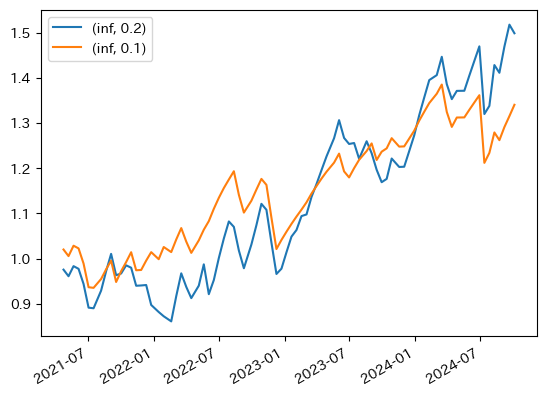

In [121]:
from tqdm.notebook import tqdm
import warnings
import math
warnings.simplefilter('ignore')

i1 = 0
sharp_ratio1 =0
j1=0
lis = []
holder= []
#schedule0 = pd.read_csv('data/RSI.csv', index_col='Date', parse_dates=True) 
#(1+np.cumsum(Price_day['N225'].pct_change().loc[df.index[0]:'2024-01-09', 'Close'])).plot()
#(1+np.cumsum(data['Return'])).plot(label='{}, {}, {}'.format(threshold, threshold2, threshold3), legend=True)
result =result.rename_axis('Date')                           
for num in range(1):
    sharp_ratio1=0
    threshold, threshold2 = 50, 70
    # (12, (0, 0), 1)
    for threshold in [0.20, 0.10]:

            #bond_leverage = 1
            #ratio = ratio**(-1)
            for a in [np.inf]:
                    #for ratio_lev in range(66,67, 10):
                    # threshold 40, threshold2 60 short 
                    loss_cut = 0.01 * a

                    


                    dic = dict(schedule=pd.DataFrame(1, index=result.index, columns=['predict']),
                            losscut=loss_cut,
                            reverse=False,
                            leverage=1, 
                            data2=N225,
                            ratio=0,
                            #bond_leverage=bond_leverage,
                            threshold=threshold)

                    
                    _, df = calc(**dic)
                    #(1+np.cumsum(df['Return'])).plot(label='{}'.format(threshold), legend=True)
                    dic['losscut']=np.inf
                    dic['schedule'] = pd.DataFrame([1 for u in range(len(result))], index=result.index, columns=['predict'])
                    dic['reverse'] = False
                    '''
                    _, df2 = calc(**dic)  # 第４因数は、Falseの方がデフォです。

                    data = df2.dropna(how='any', axis=0) #pd.concat([df, df2]).sort_index()
                    try:
                        (1+np.cumsum(data['Return'])).plot(label='Market'.format(), legend=True)
                    except:
                        continue
                    try:
                        dd = Drawdown(df2['Return'])
                    except Exception as e:
                        print(e)
                        continue
                    '''
                    data = df
                    (1+np.cumsum(data['Return'])).plot(label='{}'.format((a, threshold)), legend=True)
                    sharp_ratio = np.mean(data['Return'].values) /np.std(data['Return'], ddof=1)
                    print(sharp_ratio)
                    
                    lis.append(sharp_ratio)
                    if sharp_ratio > sharp_ratio1:

                        last_losscut = a

                        sharp_ratio1 = sharp_ratio
                        pair=(threshold)



    holder.append(pair)

print(
    f"last_losscut　：{last_losscut}",   
    #f"last_profitlevel : {last_profitlevel} ",
    f"threshold :{pair}",
    f"sharpratio : {sharp_ratio1}")   

In [96]:
df

,Return,loss_cut,profit,Asset,Exit Date,日数
2021-05-07,-0.037184,safe,-1091.647910,29357.820312,2021-06-06,69
2021-07-16,0.057994,safe,1623.998957,28003.080078,2021-08-15,68
2021-09-17,-0.033252,safe,-1014.191507,30500.050781,2021-10-17,69
2021-12-10,-0.042810,safe,-1217.413009,28437.769531,2022-01-09,69
2022-03-04,-0.009551,safe,-248.183607,25985.470703,2022-04-03,69
2022-11-25,-0.031589,safe,-893.423049,28283.029297,2022-12-25,69
2023-02-03,0.023098,safe,635.405603,27509.460938,2023-03-05,69
2023-05-19,0.067165,safe,2069.254873,30808.349609,2023-06-18,69
2023-07-14,0.005110,safe,165.517377,32391.259766,2023-08-13,69
2023-09-15,-0.002863,safe,-96.016278,33533.089844,2023-10-15,68


In [ ]:
df

In [89]:
result

,predict
Date,
2021-04-23,0.0
2021-05-07,1.0
2021-05-21,0.0
2021-06-04,0.0
2021-06-18,0.0
...,...
2024-08-09,0.0
2024-08-23,1.0
2024-09-06,0.0


In [ ]:
pair

In [ ]:
df2

In [ ]:
for i, j in Price_day.iterrows():
    print(type(i))

In [ ]:
data.to_csv('オミットデータサンプル2.csv')

In [ ]:
schedule

In [ ]:
df2

In [ ]:
    for threshold in [40]:
        for threshold2 in [50]:
            for threshold3 in [38]:

In [ ]:
holder

In [ ]:
data

In [ ]:
(1+np.cumsum(Price_day['N225'].pct_change().loc['2009-05-28':'2024-01-09', 'Close'])).plot()

In [ ]:
# 70 -> 30 OK

In [ ]:
holder

In [ ]:
lis

In [ ]:
df.shape[0]

In [ ]:
holder

In [ ]:
schedule0.query('rsi9>=60').diff().describe()

In [ ]:
# No hedge
graph(df, False, './graph_image/Nikkei_future_3moNeo', True)

In [ ]:
def Evaluation(df):
    Sel = pd.Series()
    Sel['初期資金'] = df['open_price'][0]
    
    Sel["全トレード数"] = df.shape[0]
    #print((10**2) * df.query('interest >= 0').count() / df.shape[0])
    Sel["勝率"] = "{:.2f}%".format((10**2) * df.query('interest >= 0').shape[0] / df.shape[0])
    Sel["負率"] = "{:.2f}%".format((10**2)* df.query('interest < 0').shape[0] / df.shape[0])
    Sel["全トレード平均利益"] = df['interest'].mean()
    Sel["勝ちトレード平均利益"] =  df.query('interest >= 0')['interest'].mean()
    Sel["負けトレード平均利益"] =  df.query('interest < 0')['interest'].mean()
    
    Sel["プロフィットファクター"] = df.query('interest >= 0')['interest'].sum() / -df.query('interest < 0')['interest'].sum()
    
    display(pd.DataFrame(Sel))
    fig, ax = plt.subplots()
    ax.hist(df['interest'], bins=20, label='interest')
Evaluation(df.query('signal!=1'))